In [41]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Load the data
df = pd.read_csv('./walmart_data.csv')
# df
df.columns = [c.lower() for c in df.columns]
# df
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [42]:
df.dtypes

user_id                        int64
product_id                    object
gender                        object
age                           object
occupation                     int64
city_category                 object
stay_in_current_city_years    object
marital_status                 int64
product_category               int64
purchase                       int64
dtype: object

<AxesSubplot:>

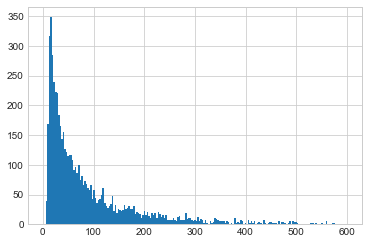

In [43]:
df.groupby(['user_id']).product_id.count().hist(bins=np.linspace(0, 600, 200))

In [44]:
df2 = pd.DataFrame({
    'column_1': [1, 2, 3, 4, 5],
    'column_2': [10, 15, 10, 20, 25]
})

(array([[1., 2., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 2., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
         0., 0., 0.]]),
 array([ 0.        ,  1.57894737,  3.15789474,  4.73684211,  6.31578947,
         7.89473684,  9.47368421, 11.05263158, 12.63157895, 14.21052632,
        15.78947368, 17.36842105, 18.94736842, 20.52631579, 22.10526316,
        23.68421053, 25.26315789, 26.84210526, 28.42105263, 30.        ]),
 <a list of 2 BarContainer objects>)

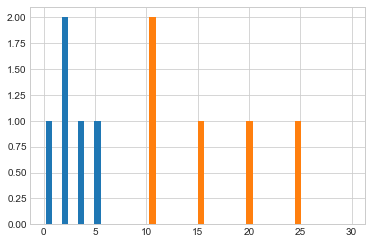

In [46]:
plt.hist(df2, bins=np.linspace(0, 30, 20))

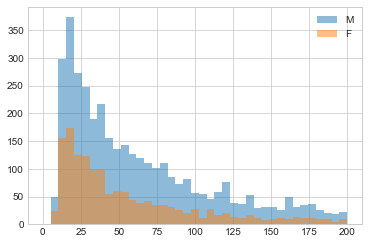

In [48]:
df.groupby(['user_id', 'gender']).product_id.count().unstack().pipe(
    lambda d: (
        d.M.dropna().hist(bins=np.linspace(0, 200, 40), alpha=0.5, label='M'),
        d.F.dropna().hist(bins=np.linspace(0, 200, 40), alpha=0.5, label='F')
    )
)
plt.legend()